# t-SNE visualization of CIFAR-100 models

In [1]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import torch

from mdistiller.models import cifar_model_dict
from mdistiller.dataset import get_dataset
from mdistiller.engine.utils import load_checkpoint
from mdistiller.engine.cfg import CFG as cfg

In [8]:
# visualize t-SNE
def get_tsne(stu, mpath):
    cfg.defrost()
    cfg.DISTILLER.STUDENT = stu
    cfg.DATASET.TYPE = 'cifar100'
    cfg.freeze()
    train_loader, val_loader, num_data, num_classes = get_dataset(cfg)
    model = cifar_model_dict[cfg.DISTILLER.STUDENT][0](num_classes=num_classes)
    model.load_state_dict(load_checkpoint(mpath)["model"])
    all_features, all_labels = [], []
    model.eval()
    with torch.no_grad():
        for i, (data, labels) in tqdm(enumerate(val_loader)):
            outputs, features = model(data)
            all_features.append(features['pooled_feat'].data.cpu().numpy())
            all_labels.append(labels.data.cpu().numpy())
    all_features = np.concatenate(all_features, 0)
    all_labels = np.concatenate(all_labels, 0)

    tsne = TSNE()
    all_features = tsne.fit_transform(all_features)
    plot_features(all_features, all_labels, num_classes)

def plot_features(features, labels, num_classes):
    colors = ['C' + str(i) for i in range(num_classes)]
    plt.figure(figsize=(6, 6))
    for l in range(num_classes):
        plt.scatter(
            features[labels == l, 0],
            features[labels == l, 1],
            c=colors[l], s=1, alpha=0.4)
    plt.xticks([])
    plt.yticks([])
    plt.savefig('./ph/ia_1.pdf',dpi=1000,bbox_inches='tight')
    plt.savefig('./ph/ia_1.eps',dpi=1000,bbox_inches='tight')

    plt.show()

40it [00:37,  1.07it/s]
G:\ANA\anaconda\envs\Z\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
G:\ANA\anaconda\envs\Z\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


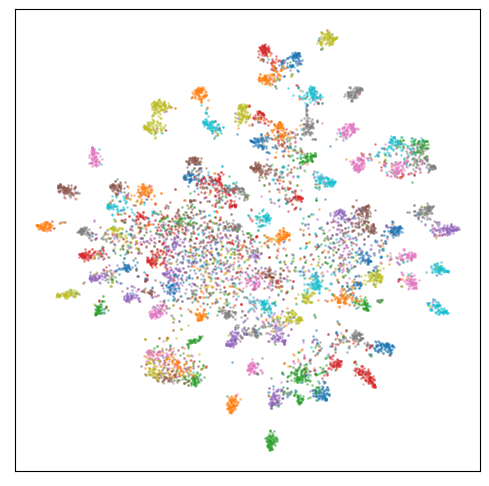

In [14]:
# KD baseline
mpath = "../download_ckpts/KD"
get_tsne("resnet8x4", mpath)

40it [00:32,  1.22it/s]
G:\ANA\anaconda\envs\Z\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
G:\ANA\anaconda\envs\Z\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


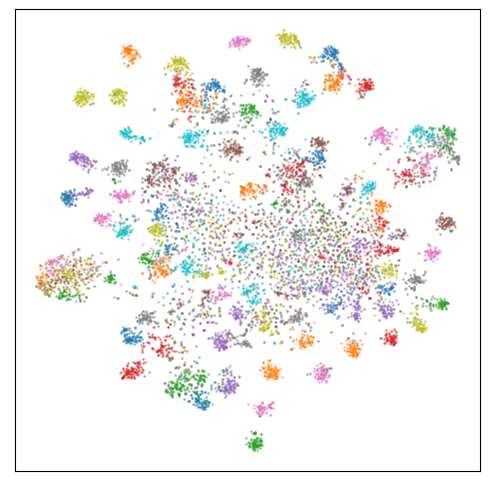

In [9]:
# Our DKD
mpath = "../download_ckpts/IAKD_res8x4"
get_tsne("resnet8x4", mpath)